In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pickle 
%matplotlib inline

In [2]:
os.chdir("C:/Users/Kevin Thelly/Documents/College/ifp_2/Mask_RCNN")

In [3]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 2E35-F7D8

 Directory of C:\Users\Kevin Thelly\Documents\College\ifp_2\Mask_RCNN

30-01-2020  13:56    <DIR>          .
30-01-2020  13:56    <DIR>          ..
12-12-2019  19:30               627 .gitignore
12-12-2019  19:30    <DIR>          assets
02-01-2020  10:21    <DIR>          cocoapi
26-01-2020  22:58                76 debug.log
27-01-2020  17:13    <DIR>          env
30-01-2020  18:22    <DIR>          ifp
30-01-2020  17:12    <DIR>          ifp_model
28-01-2020  18:09    <DIR>          images
12-12-2019  19:30             1,118 LICENSE
12-12-2019  19:30                60 MANIFEST.in
02-01-2020  09:52    <DIR>          mrcnn
12-12-2019  19:30            14,012 README.md
27-01-2020  17:15               130 requirements.txt
27-01-2020  22:53    <DIR>          samples
12-12-2019  19:30               102 setup.cfg
12-12-2019  19:30             2,586 setup.py
               8 File(s)         18,711 bytes
              10 Dir(s)

In [4]:
# Root directory of the project
ROOT_DIR = os.path.abspath("../")

import warnings
warnings.filterwarnings("ignore")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
# sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version


Using TensorFlow backend.


In [5]:
os.chdir("C:/Users/Kevin Thelly/Documents/College/ifp_2/Mask_RCNN/samples/coco")

import coco

In [6]:
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join('', "mask_rcnn_coco.h5")

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

In [7]:
coco.CocoConfig

coco.CocoConfig

In [8]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    NUM_CLASSES=81
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [9]:
#loading weights
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir='mask_rcnn_coco.hy', config=config)

# Load weights trained on MS-COCO
model.load_weights('mask_rcnn_coco.h5', by_name=True)

W0130 18:22:52.454356 23688 deprecation_wrapper.py:119] From c:\users\kevin thelly\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0130 18:22:52.473303 23688 deprecation_wrapper.py:119] From c:\users\kevin thelly\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0130 18:22:52.478290 23688 deprecation_wrapper.py:119] From c:\users\kevin thelly\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0130 18:22:52.504220 23688 deprecation_wrapper.py:119] From c:\users\kevin thelly\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:1919: The name tf.

In [10]:
# COCO Class names
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']
# class_names=['BG','person']


In [11]:
# Load a random image from the images folder
import cv2
os.chdir('C:/Users/Kevin Thelly/Documents/College/ifp_2/Mask_RCNN/images')
image = cv2.imread('5951960966_d4e1cda5d0_z.jpg')


# original image
plt.figure(figsize=(12,10))
cv2.imshow("image",image)
cv2.waitKey(0)

-1

In [17]:
os.chdir('C:/Users/Kevin Thelly/Documents/College/ifp 2/Mask_RCNN/images')
image = skimage.io.imread('2502287818_41e4b0c4fb_z.jpg')
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]

#people alone
rois=[]
scores=[]
masks=[]
class_ids=[]
count=0
for i in range(r['class_ids'].size):
    if r['class_ids'][i]==1:
        count=count+1
        rois.append(r['rois'][i])
        scores.append(r['scores'][i])
        masks.append(r['masks'][i])
        class_ids.append(r['class_ids'][i])
# rois=np.asarray(rois)
# scores=np.asarray(scores)
# masks=np.asarray(masks)
# class_ids=np.asarray(class_ids)
r1={}
r1['rois']=rois
r1['scores']=scores
r1['masks']=masks
r1['class_ids']=class_ids


print("Number of People :",count)
# ax = get_ax(1)
# visualize.display_instances(image, r1['rois'], r1['masks'], r1['class_ids'], ['person'], r1['scores'],ax=ax)

im = np.array(image)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)
for i in r1['rois']:
    y1, x1, y2, x2 = i
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1,linewidth=1,edgecolor='r',facecolor='none')
#     ax.add_patch(rect)
(50,100),40,30
# Add the patch to the Axes
fig_size = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = fig_size
os.chdir("C:/Users/Kevin Thelly/Documents/College/ifp 2/Mask_RCNN/ifp_model")
plt.savefig('foo.png', bbox_inches='tight')
# plt.savefig('foo.png')
plt.show()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/Kevin Thelly/Documents/College/ifp 2/Mask_RCNN/images'

In [26]:
os.chdir('C:/Users/Kevin Thelly/Documents/College/ifp_2/Mask_RCNN/ifp/images')
image = cv2.imread('mohan.jpg')
dimensions = image.shape
print(dimensions)
# image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# dimensions = img.shape
# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]

#people alone
rois=[]
scores=[]
masks=[]
class_ids=[]
count=0
for i in range(r['class_ids'].size):
    if r['class_ids'][i]==1:
        count=count+1
        rois.append(r['rois'][i])
        scores.append(r['scores'][i])
        masks.append(r['masks'][i])
        class_ids.append(r['class_ids'][i])
# rois=np.asarray(rois)
# scores=np.asarray(scores)
# masks=np.asarray(masks)
# class_ids=np.asarray(class_ids)
r1={}
r1['rois']=rois
r1['scores']=scores
r1['masks']=masks
r1['class_ids']=class_ids


print("Number of People :",count)
# ax = get_ax(1)
# visualize.display_instances(image, r1['rois'], r1['masks'], r1['class_ids'], ['person'], r1['scores'],ax=ax)

im = np.array(image)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
# ax.imshow(im)
for i in r1['rois']:
    y1, x1, y2, x2 = i
    print(x1,y1,x2,y2)
    image = cv2.rectangle(image,(x1, y1), (x2, y2),(255,0,0),1)
#     ax.add_patch(rect)
(50,100),40,30
# Add the patch to the Axes
fig_size = plt.rcParams["figure.figsize"]
# plt.rcParams["figure.figsize"] = fig_size
os.chdir("C:/Users/Kevin Thelly/Documents/College/ifp_2/Mask_RCNN/ifp_model")
dimensions = image.shape
print(dimensions)
cv2.imwrite("C:/Users/Kevin Thelly/Documents/College/ifp_2/Mask_RCNN/ifp_model/image.png",image)
cv2.imshow("image",image)

cv2.waitKey(0)
# plt.savefig('foo.png', bbox_inches='tight')
# plt.savefig('foo.png')
# plt.show()

(1080, 1920, 3)
Processing 1 images
image                    shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1920.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Number of People : 5
98 376 376 1036
320 569 774 1005
716 557 1006 1051
1400 564 1619 964
1507 554 1916 1044
(1080, 1920, 3)


-1

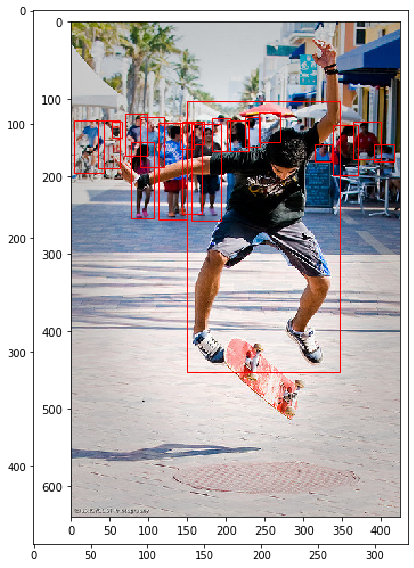

In [47]:
image = skimage.io.imread('foo.png')


# original image
# plt.figure(figsize=(12,10))
skimage.io.imshow(image)

In [0]:
m